In [4]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/user_data/mmhender/imStat/code/')
from plotting import plot_prf_params
from utils import prf_utils
import matplotlib


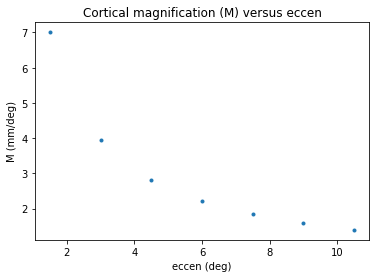

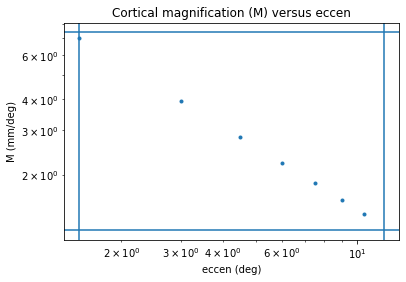

In [5]:
# Eq from Duncan & Boynton 2003, p662

# grid that is even in eccentricity, is not even in cortical magnification
eccen_linear_deg = np.arange(1.5, 12, 1.5)

M = 9.81 * eccen_linear_deg**(-0.83)

plt.figure();
plt.plot(eccen_linear_deg, M, '.')
plt.xlabel('eccen (deg)')
plt.ylabel('M (mm/deg)')
plt.title('Cortical magnification (M) versus eccen')

plt.figure();
plt.plot(eccen_linear_deg, M, '.')
plt.xlabel('eccen (deg)')
plt.ylabel('M (mm/deg)')
plt.title('Cortical magnification (M) versus eccen')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')

plt.axhline(7.39)
plt.axvline(1.5)
plt.axhline(1.2)
plt.axvline(12)

Text(0.5, 1.0, 'Cortical magnification (M) versus eccen')

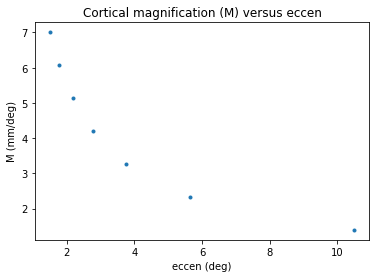

In [6]:
# Create a grid that is evenly spaced in cortical magnification steps, 
# making it uneven in eccentricity
M_vals = np.linspace(np.min(M), np.max(M),len(M))
eccen_vals_deg = (9.81/M_vals)**(1/0.83)
plt.plot(eccen_vals_deg, M_vals, '.')
plt.xlabel('eccen (deg)')
plt.ylabel('M (mm/deg)')
plt.title('Cortical magnification (M) versus eccen')

Text(0.5, 1.0, 'Vernier acuity thresh versus eccen')

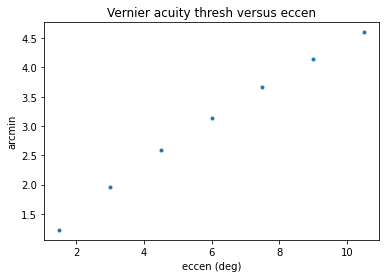

In [7]:
# Vernier acuity versus eccen
tau = 0.93 * eccen_linear_deg**(0.68)
plt.figure();
plt.plot(eccen_linear_deg, tau, '.')
plt.xlabel('eccen (deg)')
plt.ylabel('arcmin')
plt.title('Vernier acuity thresh versus eccen')

In [8]:
prf_params = prf_utils.make_log_polar_grid_scale_size_eccen()
eccen_vals = np.round(np.sqrt(prf_params[:,0]**2+prf_params[:,1]**2),2)
sigma_vals = prf_params[:,2]

print(np.round(np.unique(eccen_vals),2)*8.4)

print(np.round(np.unique(sigma_vals),2)*8.4)
prf_params1 = prf_params

[0.         0.25199997 0.50399995 0.92399997 1.428      2.1
 2.856      3.9479997  5.292      6.9719996 ]
[0.16799998 0.25199997 0.42       0.42       0.50399995 0.588
 0.67199993 0.67199993 0.756      0.84       0.92399997 1.0919999
 1.176      1.26       1.428      1.596      1.596      1.8479999
 2.0159998  2.1        2.4359999  2.6879997  2.772      3.192
 3.6959999  4.1159997  4.7879996  5.292      6.132      7.9799995 ]


In [9]:
prf_params1.shape

(476, 3)

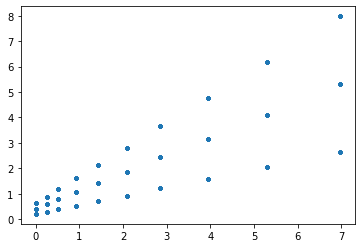

In [10]:
plt.figure();
plt.plot(eccen_vals*8.4, sigma_vals*8.4,'.')

In [11]:
prf_params = prf_utils.make_log_polar_grid()
eccen_vals = np.round(np.sqrt(prf_params[:,0]**2+prf_params[:,1]**2),2)
sigma_vals = prf_params[:,2]

print(np.round(np.unique(eccen_vals),2)*8.4)

print(np.round(np.unique(sigma_vals),2)*8.4)
prf_params2 = prf_params

[0.         0.25199997 0.50399995 0.92399997 1.428      2.1
 2.856      3.9479997  5.292      6.9719996 ]
[0.16799998 0.25199997 0.42       0.588      0.92399997 1.512
 2.268      3.5279996  5.4599996  8.4       ]


In [12]:
print(prf_params2.shape)

(1456, 3)


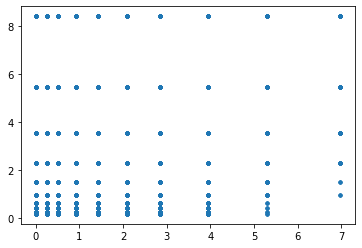

In [13]:
plt.figure();
plt.plot(eccen_vals*8.4, sigma_vals*8.4,'.')

In [14]:

prf_params = prf_utils.make_polar_angle_grid()
eccen_vals = np.round(np.sqrt(prf_params[:,0]**2+prf_params[:,1]**2),2)
sigma_vals = prf_params[:,2]

print(np.round(np.unique(eccen_vals),2)*8.4)

print(np.round(np.unique(sigma_vals),2)*8.4)
prf_params3 = prf_params

[ 0.          0.25199997  0.50399995  0.92399997  1.428       2.0159998
  2.856       3.8639998   5.2079997   6.8879995   8.988      11.759999  ]
[0.33599997 0.42       0.588      0.84       1.0919999  1.428
 1.9319999  2.6039999  3.5279996  4.704      6.2999997  8.4       ]


In [15]:
print(prf_params3.shape)

(1684, 3)


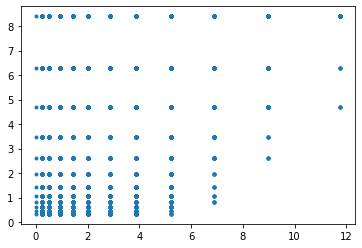

In [16]:
plt.figure();
plt.plot(eccen_vals*8.4, sigma_vals*8.4,'.')

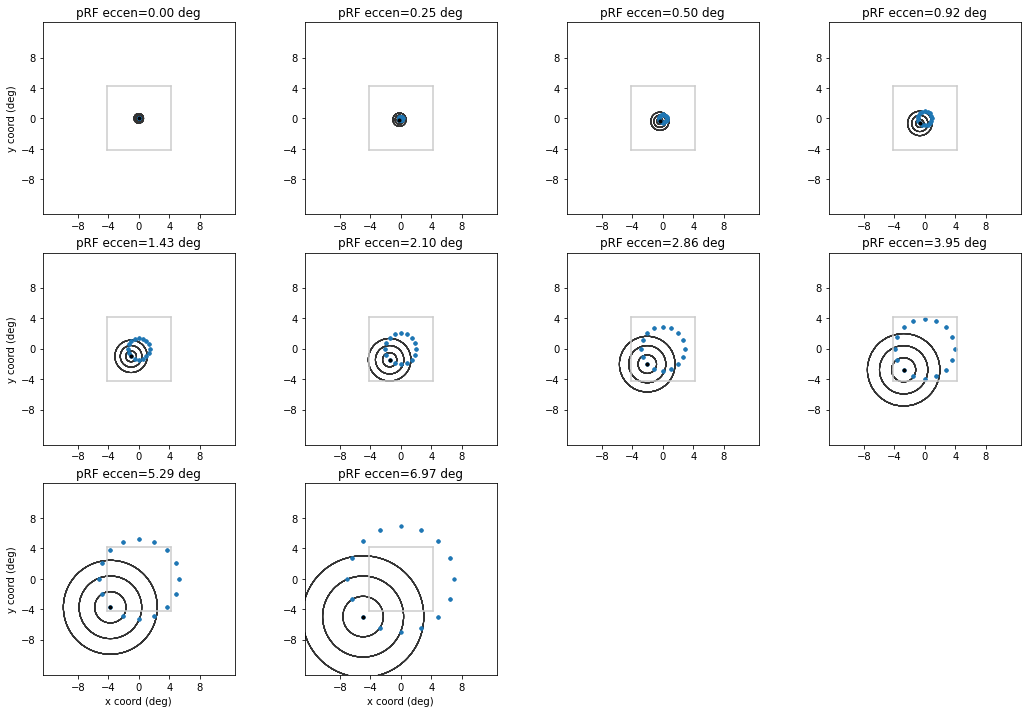

In [17]:

prf_models = prf_params1

xy_circ = [-0.4, -0.4];
screen_eccen_deg = 8.4
ecc = np.round(np.sqrt(prf_models[:,0]**2+prf_models[:,1]**2),2);
unique_eccen = np.unique(ecc);
plt.figure(figsize=(18,12));

for si, eccen in enumerate(unique_eccen):

    inds = np.where(ecc==eccen)[0]

    prf_models_plot = prf_models[inds,:]
    sizes = prf_models_plot[:,2]
    ind = np.argmin(np.abs(prf_models_plot[:,0] - xy_circ[0]) + np.abs(prf_models_plot[:,1] - xy_circ[1]))
    xy_circ_actual = [prf_models_plot[ind,0], prf_models_plot[ind,1]]

    plt.subplot(3,4,si+1)
    ax = plt.gca()
    plt.plot(prf_models[inds,0]*screen_eccen_deg, prf_models[inds,1]*screen_eccen_deg, '.')
    plt.plot(xy_circ_actual[0]*screen_eccen_deg, xy_circ_actual[1]*screen_eccen_deg, '.',color='k')
    for size in sizes:
        circ = matplotlib.patches.Circle((xy_circ_actual[0]*screen_eccen_deg, xy_circ_actual[1]*screen_eccen_deg), \
                                         size*screen_eccen_deg, color = [0.2, 0.2, 0.2], fill=False)
        ax.add_artist(circ)
    plt.axis('square')
    plt.xlim([-1.5*screen_eccen_deg, 1.5*screen_eccen_deg])
    plt.ylim([-1.5*screen_eccen_deg, 1.5*screen_eccen_deg])
    plt.xticks(np.arange(-8,9,4))
    plt.yticks(np.arange(-8,9,4))

    plt.plot([screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,-screen_eccen_deg/2], [screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [screen_eccen_deg/2, screen_eccen_deg/2],color=[0.8, 0.8, 0.8])
    plt.plot([-screen_eccen_deg/2,screen_eccen_deg/2], [-screen_eccen_deg/2, -screen_eccen_deg/2],color=[0.8, 0.8, 0.8])

    if si>7:
        plt.xlabel('x coord (deg)')
    if np.mod(si,4)==0:
        plt.ylabel('y coord (deg)')

    plt.title('pRF eccen=%.2f deg'%(eccen*screen_eccen_deg))

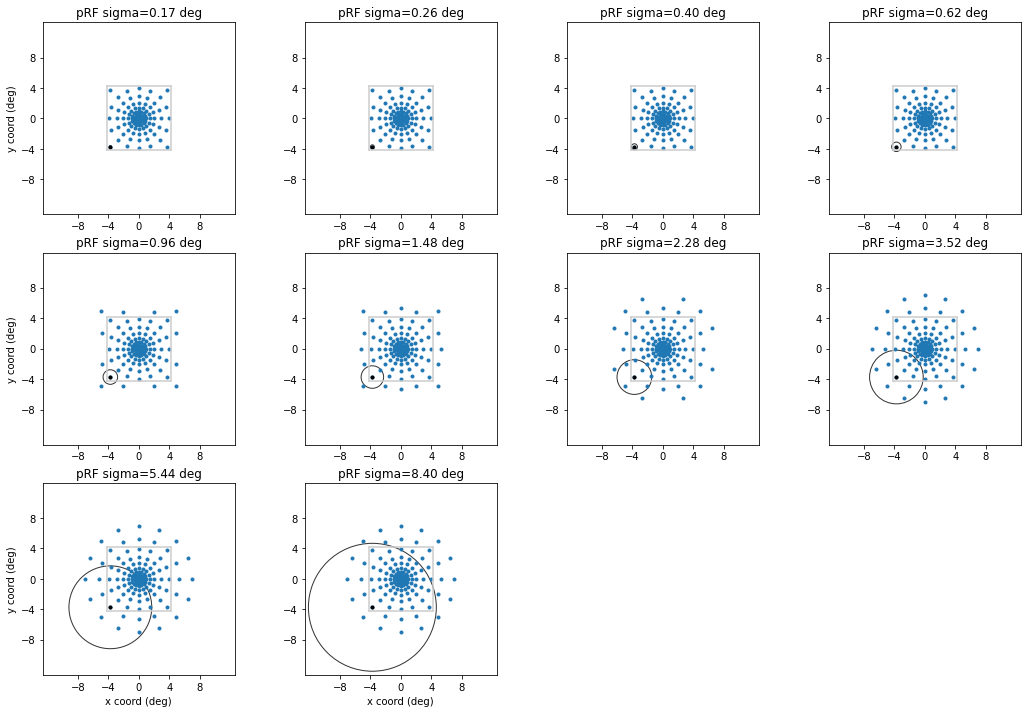

In [18]:
plot_prf_params.plot_prf_grid(prf_params2)

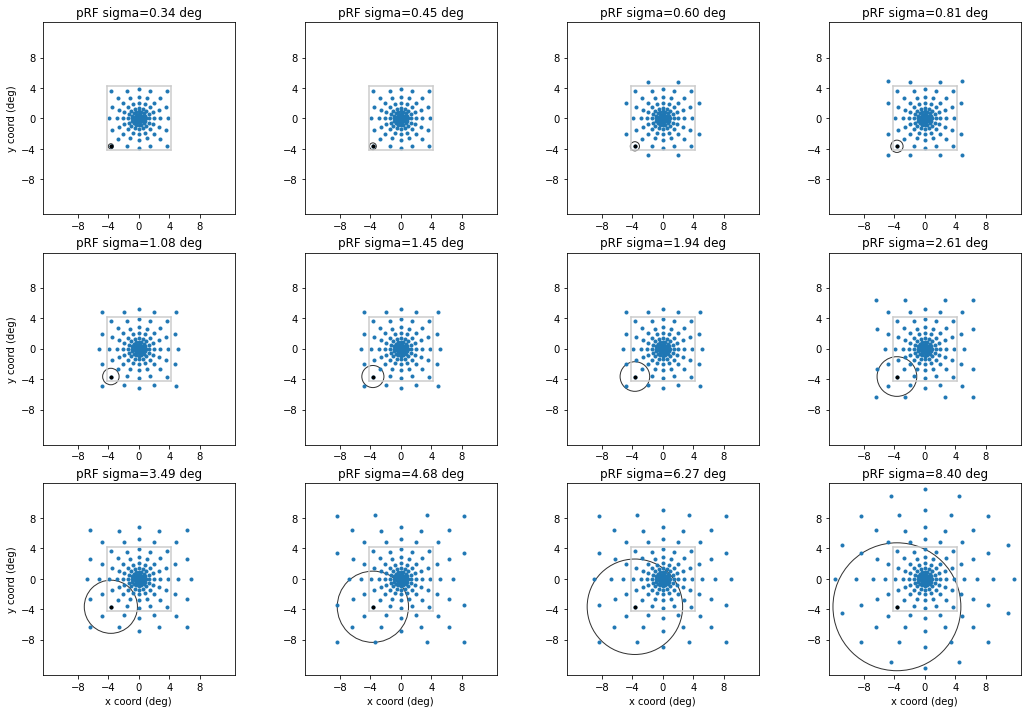

In [19]:
plot_prf_params.plot_prf_grid(prf_params3)